# Pokemon Challenge
## About
This project aims to predict wich pokemon would win a 1x1 battle based in their status.<br>
The project exploring the pokemon status can be found <a href='https://github.com/alcinoluiz/Pokemon-Data-Analysis'>here</a>.

### Import libs

In [152]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
sns.set(style="whitegrid")

### Import data

In [153]:
df_combats = pd.read_csv('pokemon-challenge/combats.csv')
df_pokemon = pd.read_csv('pokemon-challenge/pokemon.csv')
df_tests = pd.read_csv('pokemon-challenge/tests.csv')

### Explore data

#### Create type/color for a better visualization

In [154]:
types1 = df_pokemon['Type 1'].unique()
types1_colors = ['#7AC74C', '#EE8130', '#6390F0', '#A6B91A', 
                 '#A8A77A', '#A33EA1', '#F7D02C', '#E2BF65', '#D685AD', '#C22E28', '#F95587', '#B6A136',
                 '#735797', '#96D9D6', '#6F35FC', '#705746', '#B7B7CE', '#A98FF3'
                ]

type1_colors = {}

for i, type1 in enumerate(types1):
    type1_colors[type1] = types1_colors[i]
print type1_colors

{'Ghost': '#735797', 'Dark': '#705746', 'Electric': '#F7D02C', 'Ice': '#96D9D6', 'Normal': '#A8A77A', 'Fire': '#EE8130', 'Psychic': '#F95587', 'Flying': '#A98FF3', 'Poison': '#A33EA1', 'Dragon': '#6F35FC', 'Water': '#6390F0', 'Fighting': '#C22E28', 'Steel': '#B7B7CE', 'Rock': '#B6A136', 'Fairy': '#D685AD', 'Grass': '#7AC74C', 'Bug': '#A6B91A', 'Ground': '#E2BF65'}


#### Return palette

In [155]:
def get_color_by_type(dataframe):
    palette_by_name = {}
    for index, row in dataframe.iterrows():
        palette_by_name[row['Name']] = type1_colors[row['Type 1']]
    return palette_by_name

In [156]:
df_combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [157]:
df_combats.tail()

,First_pokemon,Second_pokemon,Winner
49995,707,126,707
49996,589,664,589
49997,303,368,368
49998,109,89,109
49999,9,73,9


In [158]:
df_combats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
First_pokemon     50000 non-null int64
Second_pokemon    50000 non-null int64
Winner            50000 non-null int64
dtypes: int64(3)
memory usage: 1.1 MB


In [159]:
df_pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [160]:
df_pokemon.tail()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [161]:
df_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


In [162]:
df_tests.head()

,First_pokemon,Second_pokemon
0,129,117
1,660,211
2,706,115
3,195,618
4,27,656


In [163]:
df_tests.tail()

,First_pokemon,Second_pokemon
9995,216,498
9996,113,404
9997,493,104
9998,643,259
9999,678,531


#### Win/Lose by pokemon

In [164]:
wl_pkm = df_pokemon
wl_pkm = wl_pkm.set_index(['#'])
print wl_pkm.info()
wl_pkm.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 800
Data columns (total 11 columns):
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(7), object(3)
memory usage: 69.5+ KB
None


,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [165]:
wl_pkm['Wins'] = 0
wl_pkm['Loses'] = 0

for index, row in df_combats.iterrows():
    pk1 = row['First_pokemon']
    pk2 = row['Second_pokemon']
    winner = row['Winner']
    if(winner == pk1):
        wl_pkm.loc[[pk1],['Wins']] =  wl_pkm.loc[[pk1],['Wins']] + 1
        wl_pkm.loc[[pk2],['Loses']] =  wl_pkm.loc[[pk2],['Loses']] + 1
    else:
        wl_pkm.loc[[pk2],['Wins']] =  wl_pkm.loc[[pk2],['Wins']] + 1
        wl_pkm.loc[[pk1],['Loses']] =  wl_pkm.loc[[pk1],['Loses']] + 1

wl_pkm.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Wins,Loses
#,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,37,96
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,46,75
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,89,43
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,70,55
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,55,57


In [166]:
wl_pkm.tail()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Wins,Loses
#,,,,,,,,,,,,,
796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,39,66
797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,116,15
798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,60,59
799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,89,55
800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True,75,46


In [167]:
wl_pkm['Total battle'] = wl_pkm['Wins'] + wl_pkm['Loses']
wl_pkm.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Wins,Loses,Total battle
#,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,37,96,133
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,46,75,121
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,89,43,132
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,70,55,125
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,55,57,112


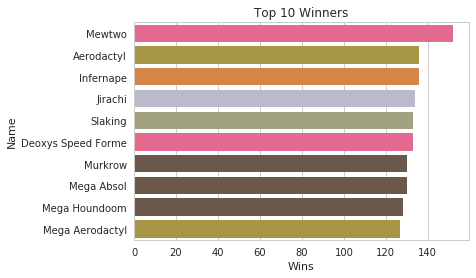

In [168]:
data = wl_pkm.nlargest(10, 'Wins')
sns.barplot(x="Wins", y='Name', data=data, palette=get_color_by_type(data)).set_title('Top 10 Winners');

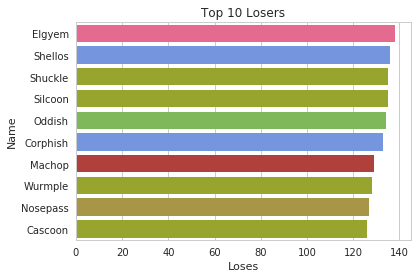

In [169]:
data = wl_pkm.nlargest(10, 'Loses')
sns.barplot(x="Loses", y='Name', data=data, palette=get_color_by_type(data)).set_title('Top 10 Losers');

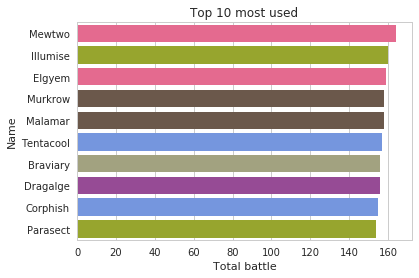

In [170]:
data = wl_pkm.nlargest(10, 'Total battle')
sns.barplot(x="Total battle", y='Name', data=data, palette=get_color_by_type(data)).set_title('Top 10 most used');

### Never used

In [171]:
wl0 = wl_pkm.loc[wl_pkm['Total battle'] == 0]
wl0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 12 to 782
Data columns (total 14 columns):
Name            16 non-null object
Type 1          16 non-null object
Type 2          8 non-null object
HP              16 non-null int64
Attack          16 non-null int64
Defense         16 non-null int64
Sp. Atk         16 non-null int64
Sp. Def         16 non-null int64
Speed           16 non-null int64
Generation      16 non-null int64
Legendary       16 non-null bool
Wins            16 non-null int64
Loses           16 non-null int64
Total battle    16 non-null int64
dtypes: bool(1), int64(10), object(3)
memory usage: 1.8+ KB


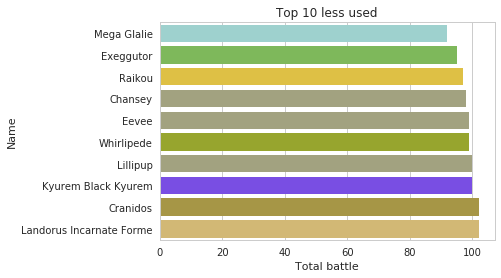

In [172]:
data = wl_pkm.loc[wl_pkm['Total battle'] > 0].nsmallest(10, 'Total battle')
sns.barplot(x="Total battle", y='Name', data=data, palette=get_color_by_type(data)).set_title('Top 10 less used');


In [173]:
wl0

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Wins,Loses,Total battle
#,,,,,,,,,,,,,,
12,Blastoise,Water,NaN,79,83,100,85,105,78,1,False,0,0,0
33,Sandshrew,Ground,NaN,50,75,85,20,30,40,1,False,0,0,0
46,Wigglytuff,Normal,Fairy,140,70,45,85,50,45,1,False,0,0,0
66,Poliwag,Water,NaN,40,50,40,40,40,90,1,False,0,0,0
78,Victreebel,Grass,Poison,80,105,65,100,70,70,1,False,0,0,0
90,Magneton,Electric,Steel,50,60,95,120,70,70,1,False,0,0,0
144,Ditto,Normal,NaN,48,48,48,48,48,48,1,False,0,0,0
183,Ariados,Bug,Poison,70,90,70,60,60,40,2,False,0,0,0
236,Ursaring,Normal,NaN,90,130,75,75,75,55,2,False,0,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5f796e090>]], dtype=object)

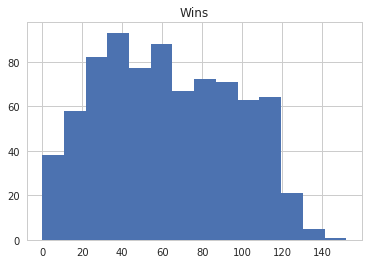

In [174]:
wl_pkm.hist(bins=14, column=['Wins'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5f7812110>]], dtype=object)

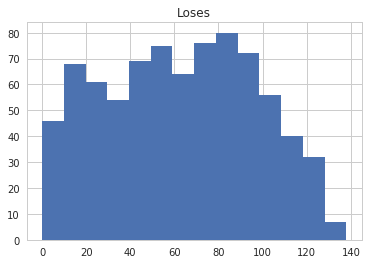

In [175]:
wl_pkm.hist(bins=14, column=['Loses'])

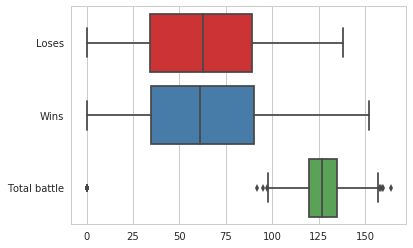

In [176]:
sns.boxplot(data=wl_pkm[['Loses','Wins','Total battle']], palette="Set1", orient='h')

#### Total battle by types

In [177]:
wl_pkm.groupby(['Type 1']).sum()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Wins,Loses,Total battle
Type 1,,,,,,,,,,,
Bug,3925,4897,4880,3717,4471,4256,222,0.0,3772,4988,8760
Dark,2071,2740,2177,2314,2155,2361,125,2.0,2447,1398,3845
Dragon,2666,3588,2764,3099,2843,2657,124,12.0,2490,1442,3932
Electric,2631,3040,2917,3961,3243,3718,144,4.0,3370,1976,5346
Fairy,1260,1046,1117,1335,1440,826,70,1.0,707,1444,2151
Fighting,1886,2613,1780,1434,1747,1784,91,0.0,1543,1763,3306
Fire,3635,4408,3524,4627,3755,3871,167,5.0,3802,2750,6552
Flying,283,315,265,377,290,410,22,2.0,362,116,478
Ghost,2062,2361,2598,2539,2447,2059,134,2.0,1877,2031,3908


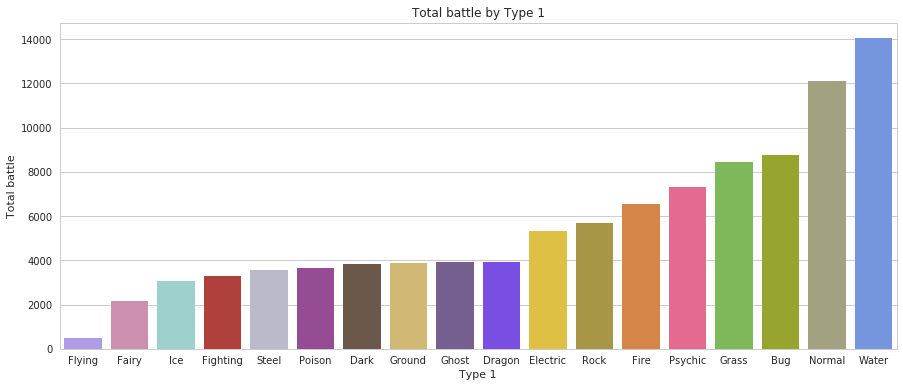

In [178]:
f, ax = plt.subplots(figsize=(15, 6))

data = wl_pkm.groupby(['Type 1'], as_index=False).sum()
order = data.sort_values(ascending=True, by=['Total battle'])

sns.barplot(x='Type 1', y="Total battle", data=data, palette=type1_colors, order=order['Type 1']).set_title('Total battle by Type 1');

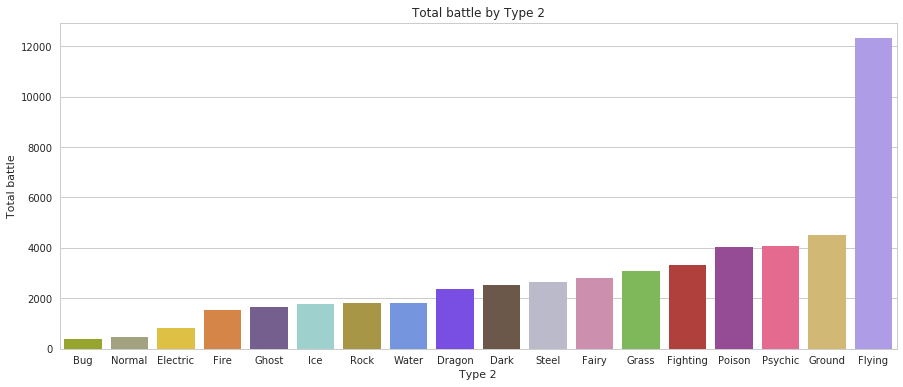

In [179]:
f, ax = plt.subplots(figsize=(15, 6))

data = wl_pkm.groupby(['Type 2'], as_index=False).sum()
order = data.sort_values(ascending=True, by=['Total battle'])

sns.barplot(x='Type 2', y="Total battle", data=data, palette=type1_colors, order=order['Type 2']).set_title('Total battle by Type 2');

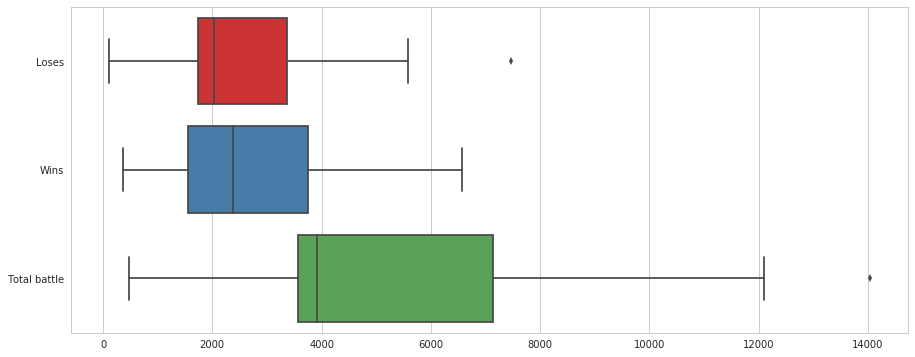

In [180]:
f, ax = plt.subplots(figsize=(15, 6))

data = wl_pkm.groupby(['Type 1'], as_index=False).sum()
order = data.sort_values(ascending=True, by=['Total battle'])

sns.boxplot(data=data[['Loses','Wins','Total battle']], palette="Set1", orient='h');

I think that <b>Total battle X Type</b> do not aggregate too much information because (most of) common types are the most used as well. <br>
Let's try <b>Type X Wins</b> and <b>Type X Loses</b>

#### Win by types

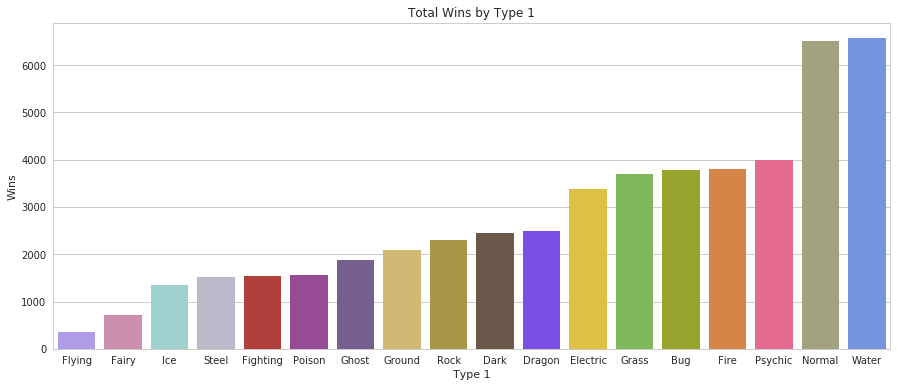

In [181]:
f, ax = plt.subplots(figsize=(15, 6))

data = wl_pkm.groupby(['Type 1'], as_index=False).sum()
order = data.sort_values(ascending=True, by=['Wins'])

sns.barplot(x='Type 1', y="Wins", data=data, palette=type1_colors, order=order['Type 1']).set_title('Total Wins by Type 1');

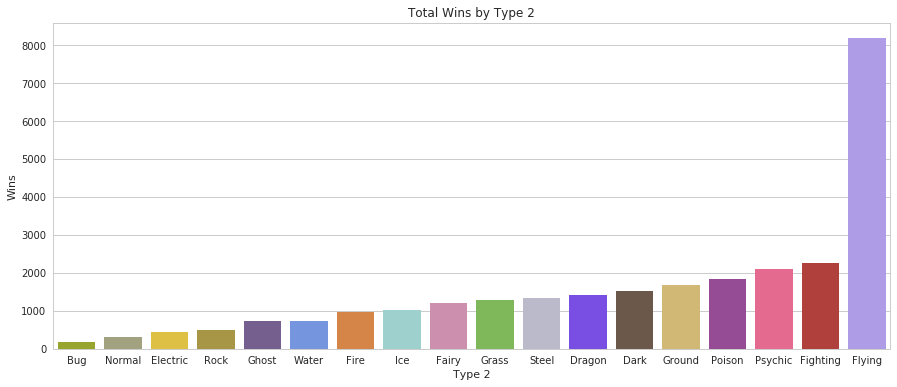

In [182]:
f, ax = plt.subplots(figsize=(15, 6))

data = wl_pkm.groupby(['Type 2'], as_index=False).sum()
order = data.sort_values(ascending=True, by=['Wins'])

sns.barplot(x='Type 2', y="Wins", data=data, palette=type1_colors, order=order['Type 2']).set_title('Total Wins by Type 2');

<hr>

### Prepare data

###  Explore models

### Train / Fit

### Results

### Tunning the model

### Final results

### Conclusion